<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/ece219_prj4_q9_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pandas matplotlib pytz

# Download the dataset (tweets data) and unzip it
!wget -O tweets_dataset.zip -L "https://ucla.box.com/shared/static/24oxnhsoj6kpxhl6gyvuck25i3s4426d"
!mkdir -p /content/tweet_data/
!unzip -o tweets_dataset.zip -d /content/tweet_data/


--2025-03-08 01:45:30--  https://ucla.box.com/shared/static/24oxnhsoj6kpxhl6gyvuck25i3s4426d
Resolving ucla.box.com (ucla.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to ucla.box.com (ucla.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/24oxnhsoj6kpxhl6gyvuck25i3s4426d [following]
--2025-03-08 01:45:30--  https://ucla.box.com/public/static/24oxnhsoj6kpxhl6gyvuck25i3s4426d
Reusing existing connection to ucla.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ucla.app.box.com/public/static/24oxnhsoj6kpxhl6gyvuck25i3s4426d [following]
--2025-03-08 01:45:30--  https://ucla.app.box.com/public/static/24oxnhsoj6kpxhl6gyvuck25i3s4426d
Resolving ucla.app.box.com (ucla.app.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to ucla.app.box.com (ucla.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location

In [2]:
import json
from datetime import datetime
import pytz

# List of hashtags corresponding to dataset files (each file contains tweets for one hashtag)
hashtags = ['gohawks', 'gopatriots', 'nfl', 'patriots', 'sb49', 'superbowl']

# Dictionary to map file tag to display name (for pretty printing results)
display_names = {
    'gohawks': '#GoHawks',
    'gopatriots': '#GoPatriots',
    'nfl': '#NFL',
    'patriots': '#Patriots',
    'sb49': '#SB49',
    'superbowl': '#SuperBowl'
}

# Loop through each hashtag file and compute the required statistics
for tag in hashtags:
    total_tweets = 0        # total number of tweets (and retweets) for this hashtag
    total_followers = 0     # sum of followers of users who posted (counting each tweet's author's followers)
    total_retweet_count = 0 # sum of retweet counts for each tweet
    first_time = None       # timestamp of first (earliest) tweet in the file
    last_time = None        # timestamp of last (latest) tweet in the file

    # Open and read each tweet (one JSON per line)
    with open(f"tweet_data/tweets_#{tag}.txt", 'r') as f:
        for line in f:
            tweet = json.loads(line)
            # Update time boundaries
            if first_time is None:
                first_time = tweet['citation_date']
            last_time = tweet['citation_date']

            # Update tweet count
            total_tweets += 1

            # Add the author's follower count for this tweet
            total_followers += tweet['author']['followers']

            # Add the number of retweets this tweet received
            total_retweet_count += tweet['metrics']['citations']['total']

    # Compute average metrics
    duration_hours = (last_time - first_time) / 3600.0  # total duration in hours
    avg_tweets_per_hour = total_tweets / duration_hours
    avg_followers_per_tweet = total_followers / total_tweets
    avg_retweets_per_tweet = total_retweet_count / total_tweets

    # Print the results for this hashtag
    print(f"{display_names[tag]}:")
    print(f"  Avg tweets per hour: {avg_tweets_per_hour:.2f}")
    print(f"  Avg followers per tweet: {avg_followers_per_tweet:.2f}")
    print(f"  Avg retweets per tweet: {avg_retweets_per_tweet:.2f}\n")


#GoHawks:
  Avg tweets per hour: 340.99
  Avg followers per tweet: 2217.92
  Avg retweets per tweet: 2.01

#GoPatriots:
  Avg tweets per hour: 41.53
  Avg followers per tweet: 1427.25
  Avg retweets per tweet: 1.41

#NFL:
  Avg tweets per hour: 461.48
  Avg followers per tweet: 4662.38
  Avg retweets per tweet: 1.53

#Patriots:
  Avg tweets per hour: 760.31
  Avg followers per tweet: 3280.46
  Avg retweets per tweet: 1.79

#SB49:
  Avg tweets per hour: 1276.86
  Avg followers per tweet: 10374.16
  Avg retweets per tweet: 2.53

#SuperBowl:
  Avg tweets per hour: 2344.89
  Avg followers per tweet: 8814.97
  Avg retweets per tweet: 2.39



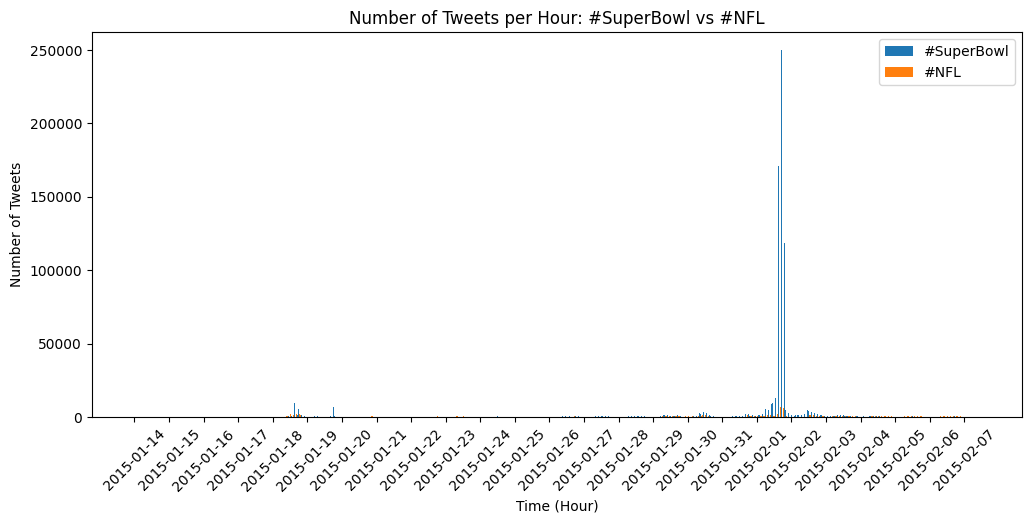

In [3]:
import json
import numpy as np
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

# Load tweets for #SuperBowl and count tweets per hour
hours_count_superbowl = {}
with open('tweet_data/tweets_#superbowl.txt', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        hour = tweet['citation_date'] // 3600  # hour bin (Unix timestamp divided by 3600)
        hours_count_superbowl[hour] = hours_count_superbowl.get(hour, 0) + 1

# Load tweets for #NFL and count tweets per hour
hours_count_nfl = {}
with open('tweet_data/tweets_#nfl.txt', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        hour = tweet['citation_date'] // 3600
        hours_count_nfl[hour] = hours_count_nfl.get(hour, 0) + 1

# Determine the overall time range (min and max hour) covering both hashtags
min_hour = min(min(hours_count_superbowl.keys()), min(hours_count_nfl.keys()))
max_hour = max(max(hours_count_superbowl.keys()), max(hours_count_nfl.keys()))
hours_range = range(min_hour, max_hour + 1)

# Prepare aligned counts for each hour in the range (fill 0 if no tweets in that hour)
counts_sb = [hours_count_superbowl.get(h, 0) for h in hours_range]
counts_nfl = [hours_count_nfl.get(h, 0) for h in hours_range]

# Plot number of tweets per hour for #SuperBowl and #NFL using a bar plot
plt.figure(figsize=(12, 5))
x = np.arange(len(hours_range))            # numeric index for each hour bin
width = 0.4                                # bar width (fraction of the interval)
plt.bar(x, counts_sb, width=width, label='#SuperBowl')
plt.bar(x + width, counts_nfl, width=width, label='#NFL')
plt.xlabel('Time (Hour)')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Hour: #SuperBowl vs #NFL')
plt.legend()

# Format x-axis ticks to show one tick per day for clarity
tick_positions = np.arange(0, len(hours_range), 24)  # a tick every 24 hours
tick_labels = []
for pos in tick_positions:
    hour_val = min_hour + pos  # convert position index back to actual hour value
    dt = datetime.fromtimestamp(hour_val * 3600, tz=pytz.UTC)
    tick_labels.append(dt.strftime('%Y-%m-%d'))
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.show()
